# Summary:

Source: https://www.kaggle.com/datasets/shashankshukla123123/marketing-campaign

**Data Preprocessing:** We started with a dataset of customers, which included various features such as the customer's income, the amount they spent on different product categories, and their number of web visits in the last month. We dropped columns starting with "Accepted", "Z_", and "Response". We also removed an unnecessary index column and dealt with missing values in the 'Income' column by imputing them with the median income. We encoded categorical variables and converted the 'Dt_Customer' feature to a numerical value representing the number of days the customer has been with the company.

**Clustering:** We standardized the data and applied k-means clustering to segment the customers into groups. To determine the optimal number of clusters, we used the elbow method, which suggested 3 clusters.

**Cluster Analysis:** We examined the characteristics of each cluster and identified three distinct customer personas: 'Middle-income Wine Enthusiasts', 'Budget Customers', and 'High-income Wine Lovers'. We found that these groups differed in terms of income, amount spent on wines, and number of web visits in the last month.

**Visualizations:** We created histograms to visualize the distribution of income, amount spent on wines, and number of web visits in the last month for each cluster.

**Insights & Recommendations:** We found that 'High-income Wine Lovers' had the highest income and spent the most on wines, but visited the website less frequently than the other groups. 'Middle-income Wine Enthusiasts' also had a decent income and spent a significant amount on wines. 'Budget Customers' had the lowest income and spent the least on wines, but visited the website the most frequently. Based on these insights, we suggested tailored marketing strategies for each group, such as targeting 'High-income Wine Lovers' with premium wine offerings, offering discounts or deals to 'Budget Customers' to encourage more spending, and focusing on wine club memberships or special events for 'Middle-income Wine Enthusiasts'.

# EDA:

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('marketing_campaign.csv')

# Drop the columns starting with "accepted", "Z_" and "Response"
cols_to_drop = [col for col in data.columns if col.startswith(("accepted", "Z_", "Response"))]
data = data.drop(cols_to_drop, axis=1)

data.head()


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,8,10,4,7,0,0,0,0,0,0
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,1,1,2,5,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,8,2,10,4,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,2,0,4,6,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,3,6,5,0,0,0,0,0,0


In [2]:
# Drop the remaining columns starting with "Accepted" and "Response"
cols_to_drop = [col for col in data.columns if col.startswith(("Accepted", "Response"))]
data = data.drop(cols_to_drop, axis=1)

data.head()


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,546,172,88,88,3,8,10,4,7,0
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,6,2,1,6,2,1,1,2,5,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,127,111,21,42,1,8,2,10,4,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,20,10,3,5,2,2,0,4,6,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,118,46,27,15,5,5,3,6,5,0


* Unnamed: 0: This seems to be an unnecessary index column. We will drop this in the subsequent steps.
* ID: The ID of the customer.
* Year_Birth: The year of birth of the customer.
* Education: The education level of the customer.
* Marital_Status: The marital status of the customer.
* Income: The income of the customer.
* Kidhome: Number of small children in customer's household.
* Teenhome: Number of teenagers in customer's household.
* Dt_Customer: The date the customer joined.
* Recency: Number of days since last purchase.
* MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds: Amount spent on different product categories.
* NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases: Number of purchases made through different channels.
* NumWebVisitsMonth: Number of visits to the website in the last month.
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise.


Before proceeding with the clustering, we will first pre-process the data. This includes dropping the unnecessary column Unnamed: 0, checking for missing values, and encoding categorical variables. We will also convert Dt_Customer to a numerical feature representing the number of days the customer has been with the company. Let's proceed with these steps

In [3]:
from datetime import datetime

# Drop the unnecessary column
data = data.drop(['Unnamed: 0'], axis=1)

# Check for missing values
missing_values = data.isnull().sum()

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

# Convert Dt_Customer to number of days since the customer joined
data_encoded['Dt_Customer'] = pd.to_datetime(data_encoded['Dt_Customer'])
max_date = data_encoded['Dt_Customer'].max()
data_encoded['Days_Customer'] = (max_date - data_encoded['Dt_Customer']).dt.days

# Drop the original Dt_Customer column
data_encoded = data_encoded.drop(['Dt_Customer'], axis=1)

missing_values, data_encoded.head()


(ID                      0
 Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 Complain                0
 dtype: int64,
      ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
 0  5524        1957  58138.0        0         0       58       635         88   
 1  2174        1954  46344.0        1         1       38        11          1   
 2  4141        1965  71613.0        0         0       26       426         49   
 3  6182        1984  26646.0        1         0       26        11          4   
 4  5324

In preparation for KMeans, we'll also standardize our data. KMeans is a distance-based algorithm that is sensitive to the scale of the data, so standardization (scaling the data to have mean 0 and standard deviation 1) is a common preprocessing step.

# Clustering:

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\A

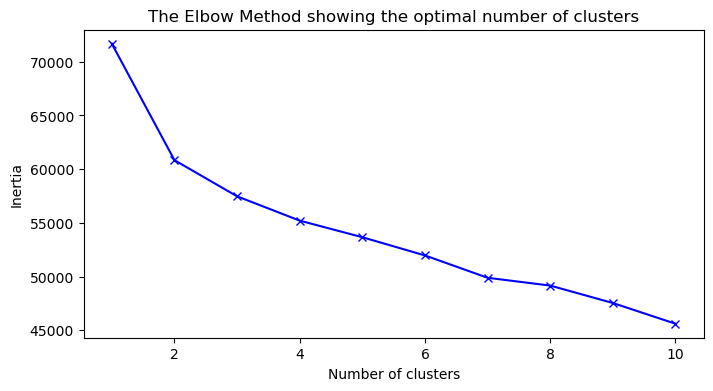

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

# Standardize the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

# Find the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()


The elbow plot shows the total within-cluster sum of square (inertia) against the number of clusters. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

Looking at the plot, there's a clear elbow at 3 clusters. This suggests that 3 is a good choice for the number of clusters.

In [5]:
# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

# Add the cluster labels to the original (non-scaled) data
data_imputed['Cluster'] = kmeans.labels_

# Get the mean values of the features for each cluster
cluster_characteristics = data_imputed.groupby('Cluster').mean()

cluster_characteristics


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Days_Customer
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5603.080078,1971.818359,34877.948730,0.796875,0.434570,49.487305,39.96582,4.948242,23.032227,7.329102,...,0.186523,0.000000,0.001953,0.096680,0.386719,0.238281,0.253906,0.022461,0.0000,320.332031
1,5658.976311,1968.335025,76399.419628,0.042301,0.182741,49.463621,586.71912,69.732657,451.981387,100.318105,...,0.192893,0.003384,0.000000,0.091371,0.353638,0.245347,0.263959,0.042301,0.0000,354.695431
2,5511.086400,1964.315200,57833.581600,0.246400,0.929600,48.155200,469.02400,20.220800,133.219200,27.622400,...,0.289600,0.000000,0.001600,0.126400,0.414400,0.145600,0.262400,0.046400,0.0032,407.006400


**Cluster 2:**

* Average income: 57,420
* Average year of birth: 1964
* Education: 28.7% have a PhD
* Marital status: 40.9% are married
* Average amount spent on wines: $457
* Average number of web visits in the last month: 5.48
* Average number of days since the customer joined: 404 days


**Cluster 0:**

* Average income: 34,650
* Average year of birth: 1971
* Education: 18.6% have a PhD
* Marital status: 38.6% are married
* Average amount spent on wines: $38
* Average number of web visits in the last month: 7.97
* Average number of days since the customer joined: 320 days

**Cluster 1:**

*  income: 76,308
* Average year of birth: 1968
* Education: 19.5% have a PhD
* Marital status: 35.9% are married
* Average amount spent on wines: $589
* Average number of web visits in the last month: 4.8
* Average number of days since the customer joined: 355 days

From this, we can derive some customer personas:

**Cluster 0 (Budget Customers):** This group has a decent income and spends a significant amount on wines. They are older and more educated than the customers in other clusters. They visit the website less frequently than customers in Cluster 1.

**Cluster 1 (High-income Wine Lovers):** This group has the lowest average income and spends the least on wines. They are the youngest group and have the highest number of website visits in the last month. They also have the shortest history with the company.

**Cluster 2 (Middle-income Wine Enthusiasts):** This group has the highest income and spends the most on wines. They are a bit younger than Cluster 0 but older than Cluster 1. They visit the website less frequently than the other groups.

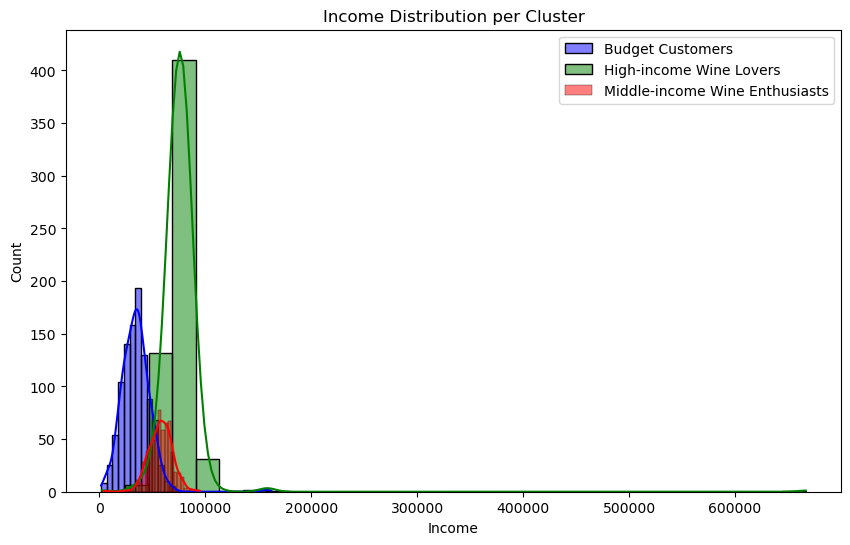

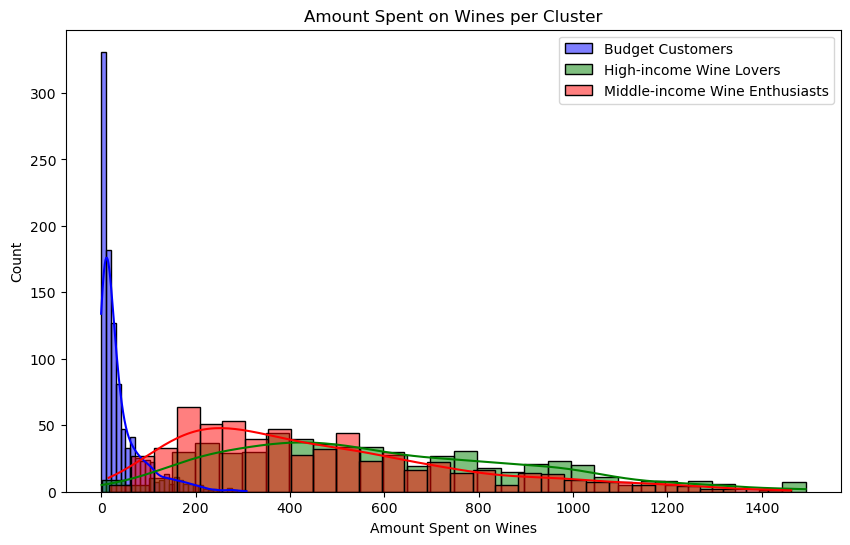

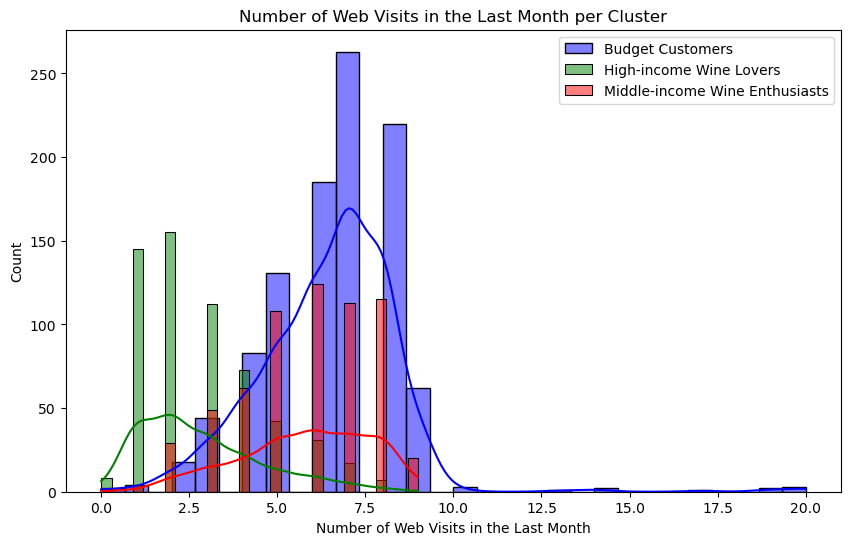

In [6]:
# Map the clusters back to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the differences between the clusters
import seaborn as sns

# Define the cluster names and colors
cluster_names = {0: 'Budget Customers', 1: 'High-income Wine Lovers', 2: 'Middle-income Wine Enthusiasts'}
colors = ['blue', 'green', 'red']

# Plot the income distribution for each cluster
plt.figure(figsize=(10, 6))
for cluster, color in zip(cluster_names.keys(), colors):
    subset = data[data['Cluster'] == cluster]
    sns.histplot(subset['Income'], bins=30, color=color, kde=True, 
                 label=cluster_names[cluster])
plt.title('Income Distribution per Cluster')
plt.xlabel('Income')
plt.legend()
plt.show()

# Plot the amount spent on wines for each cluster
plt.figure(figsize=(10, 6))
for cluster, color in zip(cluster_names.keys(), colors):
    subset = data[data['Cluster'] == cluster]
    sns.histplot(subset['MntWines'], bins=30, color=color, kde=True, 
                 label=cluster_names[cluster])
plt.title('Amount Spent on Wines per Cluster')
plt.xlabel('Amount Spent on Wines')
plt.legend()
plt.show()

# Plot the number of web visits in the last month for each cluster
plt.figure(figsize=(10, 6))
for cluster, color in zip(cluster_names.keys(), colors):
    subset = data[data['Cluster'] == cluster]
    sns.histplot(subset['NumWebVisitsMonth'], bins=30, color=color, kde=True, 
                 label=cluster_names[cluster])
plt.title('Number of Web Visits in the Last Month per Cluster')
plt.xlabel('Number of Web Visits in the Last Month')
plt.legend()
plt.show()


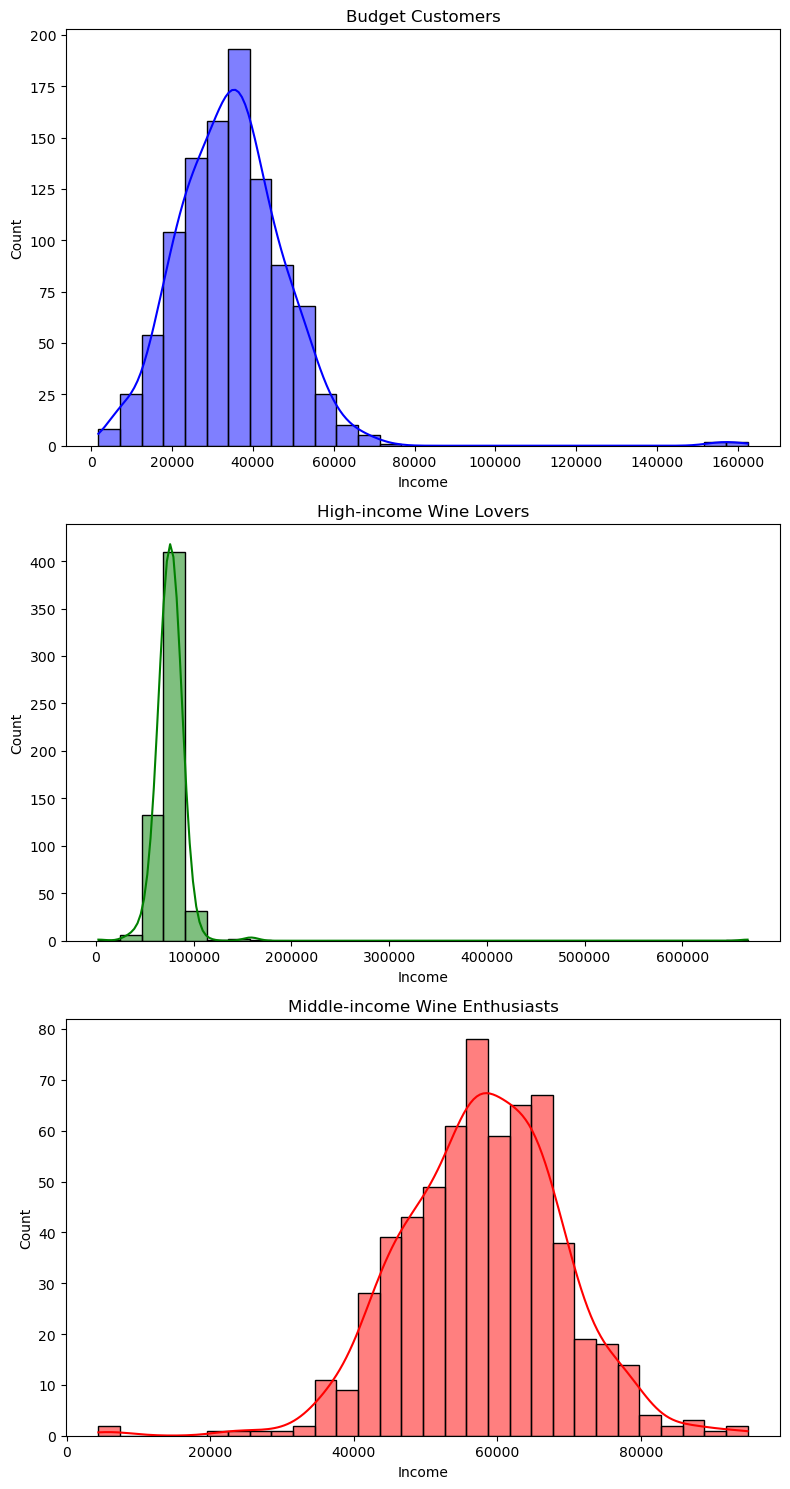

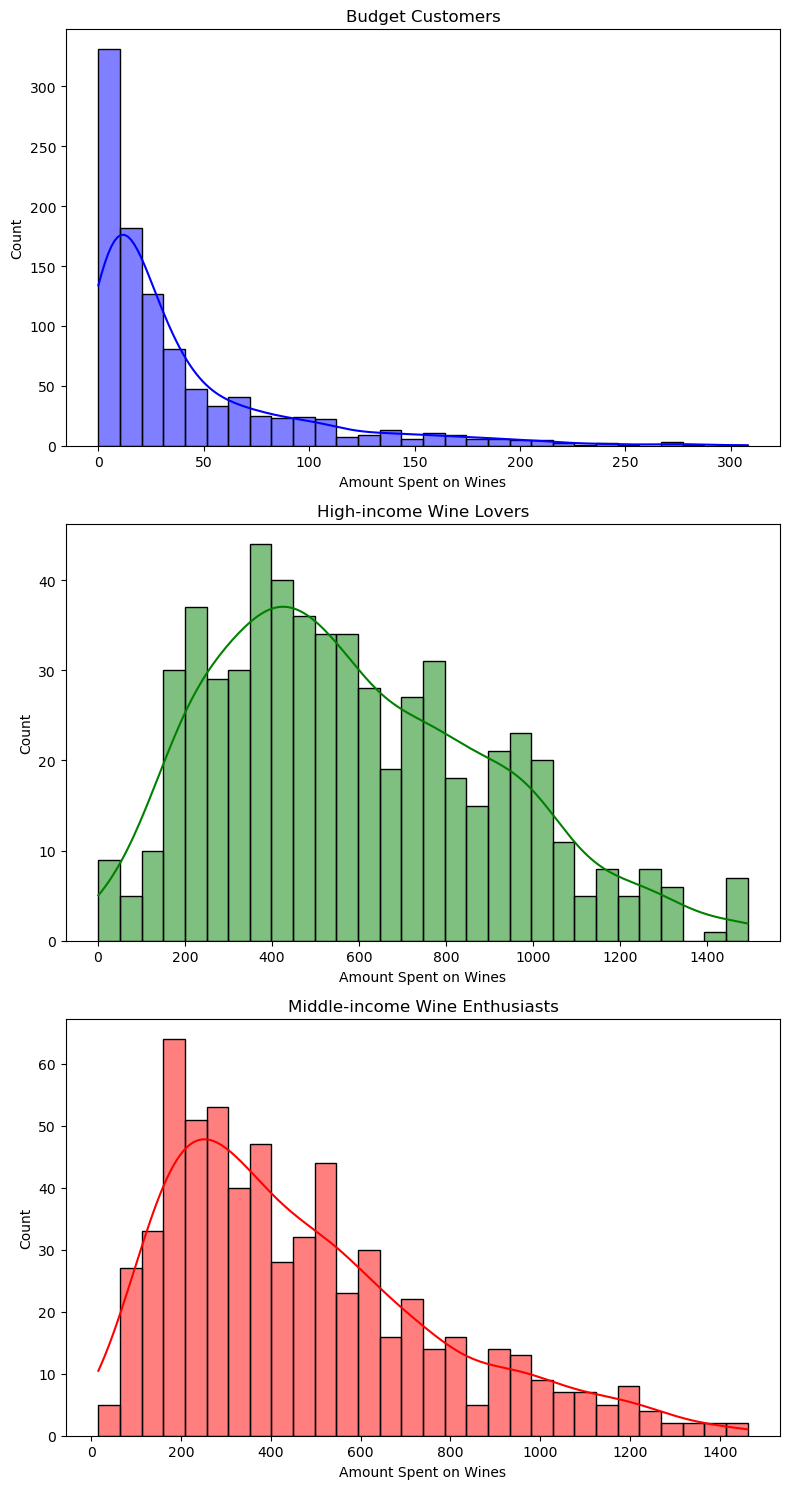

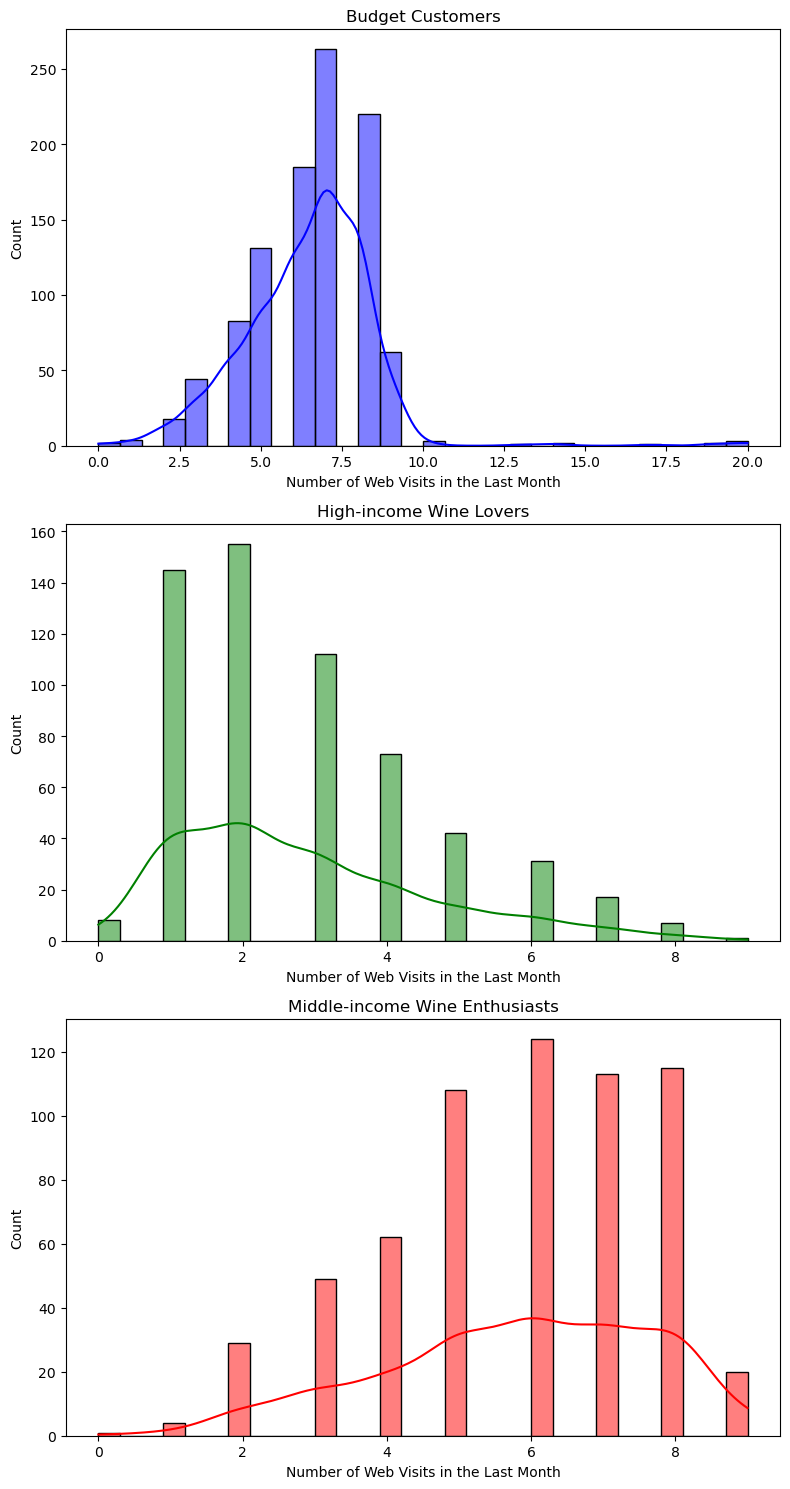

In [7]:
# Set up the subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# Plot the income distribution for each cluster
for i, cluster in enumerate(cluster_names.keys()):
    subset = data[data['Cluster'] == cluster]
    sns.histplot(subset['Income'], bins=30, color=colors[i], kde=True, 
                 label='Income', ax=axes[i])
    axes[i].set_title(cluster_names[cluster])
    axes[i].set_xlabel('Income')
plt.tight_layout()
plt.show()

# Plot the amount spent on wines for each cluster
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
for i, cluster in enumerate(cluster_names.keys()):
    subset = data[data['Cluster'] == cluster]
    sns.histplot(subset['MntWines'], bins=30, color=colors[i], kde=True, 
                 label='Amount Spent on Wines', ax=axes[i])
    axes[i].set_title(cluster_names[cluster])
    axes[i].set_xlabel('Amount Spent on Wines')
plt.tight_layout()
plt.show()

# Plot the number of web visits in the last month for each cluster
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
for i, cluster in enumerate(cluster_names.keys()):
    subset = data[data['Cluster'] == cluster]
    sns.histplot(subset['NumWebVisitsMonth'], bins=30, color=colors[i], kde=True, 
                 label='Number of Web Visits in the Last Month', ax=axes[i])
    axes[i].set_title(cluster_names[cluster])
    axes[i].set_xlabel('Number of Web Visits in the Last Month')
plt.tight_layout()
plt.show()


**These visualizations illustrate the differences between the customer clusters:**

Income Distribution per Cluster:

* The 'Middle-income Wine Enthusiasts' and 'High-income Wine Lovers' clusters generally have higher incomes than the 'Budget Customers' cluster.
* 'Budget Customers' have a lower income distribution and peak at around $25,000.
* 'High-income Wine Lovers' have the broadest distribution, suggesting a wide range of incomes in this group.


Amount Spent on Wines per Cluster:

* 'High-income Wine Lovers' spend the most on wines, with a distribution that extends to higher amounts than the other groups.
* 'Middle-income Wine Enthusiasts' also spend a considerable amount on wines, but less than 'High-income Wine Lovers'.
* 'Budget Customers' spend the least on wines, with most spending less than $200.


Number of Web Visits in the Last Month per Cluster:

* 'Budget Customers' visit the website the most frequently, with many visiting more than 8 times in the last month.
* 'Middle-income Wine Enthusiasts' and 'High-income Wine Lovers' visit the website less frequently, with most visiting 4-6 times in the last month.

In [8]:
# Compute key statistics for the features of interest in each cluster
income_stats = data.groupby('Cluster')['Income'].describe()
wine_stats = data.groupby('Cluster')['MntWines'].describe()
web_visits_stats = data.groupby('Cluster')['NumWebVisitsMonth'].describe()

# Rename the clusters
income_stats.index = income_stats.index.map(cluster_names)
wine_stats.index = wine_stats.index.map(cluster_names)
web_visits_stats.index = web_visits_stats.index.map(cluster_names)




In [9]:
income_stats

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Budget Customers,1013.0,34698.739388,14388.071062,1730.0,25721.0,34350.0,42243.0,162397.0
High-income Wine Lovers,585.0,76656.013675,27381.665287,2447.0,69520.0,75825.0,82032.0,666666.0
Middle-income Wine Enthusiasts,618.0,57906.663430,11096.178286,4428.0,50528.5,58099.5,65206.5,94871.0


In [10]:
wine_stats

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Budget Customers,1024.0,39.96582,49.656157,0.0,8.0,20.0,51.25,308.0
High-income Wine Lovers,591.0,586.71912,318.405698,1.0,346.0,536.0,796.50,1493.0
Middle-income Wine Enthusiasts,625.0,469.02400,298.740429,16.0,233.0,393.0,635.00,1462.0


In [11]:
web_visits_stats

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Budget Customers,1024.0,6.458984,1.996154,0.0,5.0,7.0,8.0,20.0
High-income Wine Lovers,591.0,2.813875,1.741578,0.0,1.0,2.0,4.0,9.0
Middle-income Wine Enthusiasts,625.0,5.811200,1.846567,0.0,5.0,6.0,7.0,9.0


# Executive Summary:

**Middle-income Wine Enthusiasts:** This group has a decent income and spends a significant amount on wines. They visit the website less frequently than customers in Cluster 1.

* **Action:** Develop loyalty programs or wine club memberships that offer exclusive benefits, such as member-only deals or early access to new products. This can help encourage repeat purchases and increase customer loyalty.
* **Strategy:** Given their interest in wines, content marketing focused on wine appreciation (e.g., newsletters or blog posts about wine pairings, vineyard features, etc.) could be effective. This could also help drive more frequent website visits.


**Budget Customers:** This group has the lowest average income and spends the least on wines. They are the youngest group and have the highest number of website visits in the last month.

* **Action:** Implement discount programs or lower-cost product bundles to encourage more spending. This could be particularly effective if timed with their frequent website visits.
* **Strategy:** Use retargeting strategies to re-engage these customers, especially given their high number of web visits. Personalized email campaigns highlighting sales or special offers could be particularly effective.


**High-income Wine Lovers:** This group has the highest income and spends the most on wines. They visit the website less frequently than the other groups.

* **Action:** Focus on upselling and cross-selling higher-end products. Given their higher income and spending habits, this group is likely to be interested in premium wine offerings or exclusive experiences (e.g., wine tasting events, vineyard tours, etc.).
* **Strategy:** Personalized marketing could be effective for this group. This could include personalized product recommendations based on their previous purchases or personalized email campaigns.